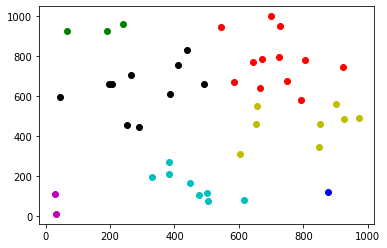

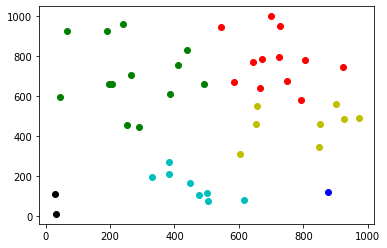

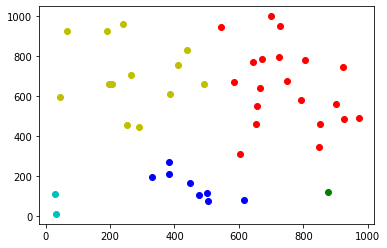

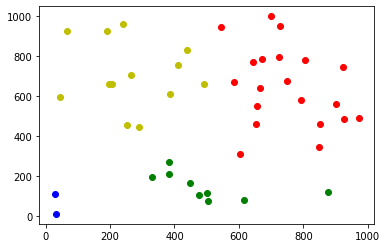

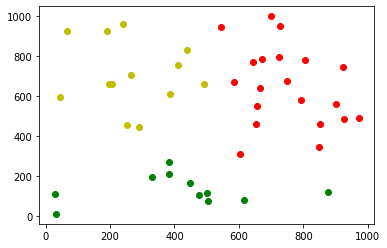

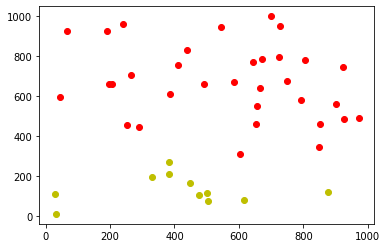

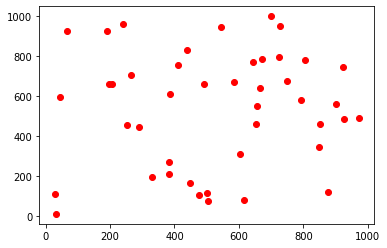

[(543, 943), (698, 998), (196, 660), (670, 786), (654, 462), (645, 768), (657, 551), (254, 458), (205, 658), (66, 922), (876, 119), (604, 312), (901, 561), (728, 947), (266, 703), (923, 747), (382, 212), (411, 756), (616, 79), (492, 658), (804, 779), (240, 959), (291, 446), (749, 673), (925, 487), (476, 106), (791, 580), (972, 489), (852, 462), (192, 923), (382, 271), (723, 795), (847, 344), (449, 164), (665, 641), (505, 78), (387, 612), (439, 830), (28, 111), (33, 12), (501, 115), (44, 595), (331, 195), (585, 668)]


<Figure size 432x288 with 0 Axes>

In [6]:
# Импортируем необходимые модули:
import math
import random
import numpy as np
from matplotlib import pyplot as plt
import plotly.figure_factory as ff

# Создаём случайный датасет для последующего анализа:
dataset = []

for i in range(random.randint(10,100)):
    point = (random.randint(0,1001),random.randint(0,1001))
    dataset.append(point)

# Здесь мы определяем расстояние между ОБЪЕКТАМИ:

#Евклидовое расстояние
def euclid_distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def modul_distance(p1, p2):
    return (abs(p1[0]-p2[0]) + abs(p1[1]-p2[1]))

#Далее мы определяем уже расстояние между КЛАСТЕРАМИ:

#dist_min
def dist_min(Ci, Cj):
    return min(modul_distance(i, j) for i in Ci for j in Cj)
#dist_max
def dist_max(Ci, Cj):
    return max(modul_distance(i, j) for i in Ci for j in Cj)
#dist_avg
def dist_avg(Ci, Cj):
    return sum(euclid_distance(i, j) for i in Ci for j in Cj)/(len(Ci)*len(Cj))


def find_Min(M):
    min = 1000
    x = 0; y = 0
    for i in range(len(M)):
        for j in range(len(M[i])):
            if i != j and M[i][j] < min:
                min = M[i][j];x = i; y = j
    return (x, y, min)

# Основной алгоритм вычислений:
def AGNES(dataset, dist, k):
    C = [];M = []
    for i in dataset:
        Ci = []
        Ci.append(i)
        C.append(Ci)
    for i in C:
        Mi = []
        for j in C:
            Mi.append(dist(i, j))
        M.append(Mi)
    q = len(dataset)
    while q > k:
        x, y, min = find_Min(M)
        C[x].extend(C[y])
        C.remove(C[y])
        M = []
        for i in C:
            Mi = []
            for j in C:
                Mi.append(dist(i, j))
            M.append(Mi)
        q -= 1
    return C


# Визуализация
def draw(C):
    for i in range(len(C)):
        x = []    
        y = []    
        for j in range(len(C[i])):
            x.append(C[i][j][0])
            y.append(C[i][j][1])
        colors = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
        plt.scatter(x, y, marker='o', color=colors[i%len(colors)], label=i)
    plt.show()
    
# for i in range(len(dataset)):
#     result = AGNES(dataset, dist_avg, len(dataset) - (i+1))
#     draw(result)

for i in range(7):
    result = AGNES(dataset, dist_avg, 7 - i)
    draw(result)
    plt.savefig(f"{i+1}")
print(dataset)

np_dataset = np.array(dataset)
fig = ff.create_dendrogram(np_dataset, orientation='left')
fig.update_layout(width=1000, height=1000)
fig.show()
